In [1]:
pip install gensim


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("INDIA.csv",encoding='ISO-8859-1')

In [4]:
dp=pd.read_csv("fake.csv")

In [5]:
df.head()

,id,Statement,Image,Web,Category,Date,Label
0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,TRUE
2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,Oct-20,TRUE
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,Oct-20,TRUE


df.sample(5)

In [6]:
df['Statement']

0        WHO praises India's Aarogya Setu app, says it ...
1        In Delhi, Deputy US Secretary of State Stephen...
2        LAC tensions: China's strategy behind delibera...
3        India has signed 250 documents on Space cooper...
4        Tamil Nadu chief minister's mother passes away...
                               ...                        
56709    Fact Check: This is not Bruce Lee playing ping...
56710    Fact Check: Did Japan construct this bridge in...
56711    Fact Check: Viral video of Mexico earthquake i...
56712    Fact Check: Ballet performance by Chinese coup...
56713    Fact Check: Is this little boy crossing into J...
Name: Statement, Length: 56714, dtype: object

In [7]:
df.Statement[10]
# df.Label[10]

"Amid stubble burning, Delhi's air quality deteriorates to 'very poor'"

In [8]:
dp.info

<bound method DataFrame.info of        Unnamed: 0                                              title  \
0               0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1               1                                                NaN   
2               2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3               3  Bobby Jindal, raised Hindu, uses story of Chri...   
4               4  SATAN 2: Russia unvelis an image of its terrif...   
...           ...                                                ...   
72129       72129  Russians steal research on Trump in hack of U....   
72130       72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131       72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132       72132  Trump tussle gives unpopular Mexican leader mu...   
72133       72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                                    text  label  
0      No comment is expected from Ba

In [9]:
df.info

<bound method DataFrame.info of           id                                          Statement  \
0          2  WHO praises India's Aarogya Setu app, says it ...   
1          3  In Delhi, Deputy US Secretary of State Stephen...   
2          4  LAC tensions: China's strategy behind delibera...   
3          5  India has signed 250 documents on Space cooper...   
4          6  Tamil Nadu chief minister's mother passes away...   
...      ...                                                ...   
56709  56711  Fact Check: This is not Bruce Lee playing ping...   
56710  56712  Fact Check: Did Japan construct this bridge in...   
56711  56713  Fact Check: Viral video of Mexico earthquake i...   
56712  56714  Fact Check: Ballet performance by Chinese coup...   
56713  56715  Fact Check: Is this little boy crossing into J...   

                                                   Image         Web  \
0      https://cdn.dnaindia.com/sites/default/files/s...    DNAINDIA   
1      https://cdn.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56714 entries, 0 to 56713
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         56714 non-null  int64 
 1   Statement  56714 non-null  object
 2   Image      56714 non-null  object
 3   Web        56714 non-null  object
 4   Category   56714 non-null  object
 5   Date       45393 non-null  object
 6   Label      56714 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.0+ MB


In [11]:
#checking if there is any null value is there or not or missing value
df.isna().sum()

id               0
Statement        0
Image            0
Web              0
Category         0
Date         11321
Label            0
dtype: int64

In [12]:
#dropping the columns id,images,date,web,category,axis=1 because we are dropping the coloumns not rows
df=df.drop(['id','Image','Web','Category','Date'],axis=1)

In [13]:
df.head()

,Statement,Label
0,"WHO praises India's Aarogya Setu app, says it ...",TRUE
1,"In Delhi, Deputy US Secretary of State Stephen...",TRUE
2,LAC tensions: China's strategy behind delibera...,TRUE
3,India has signed 250 documents on Space cooper...,TRUE
4,Tamil Nadu chief minister's mother passes away...,TRUE


# DATA PREPROCESSING

In [14]:
#applying lowercase to statement that will add less complexity in tokenization
df['Statement']=df['Statement'].str.lower()

In [15]:
df.head()

,Statement,Label
0,"who praises india's aarogya setu app, says it ...",TRUE
1,"in delhi, deputy us secretary of state stephen...",TRUE
2,lac tensions: china's strategy behind delibera...,TRUE
3,india has signed 250 documents on space cooper...,TRUE
4,tamil nadu chief minister's mother passes away...,TRUE


In [16]:
df.isna().sum()

Statement    0
Label        0
dtype: int64

In [17]:
df.shape

(56714, 2)

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [19]:
#converting true =1 and false=0
df['Label']=encoder.fit_transform(df['Label'])


In [20]:
df.head()

,Statement,Label
0,"who praises india's aarogya setu app, says it ...",1
1,"in delhi, deputy us secretary of state stephen...",1
2,lac tensions: china's strategy behind delibera...,1
3,india has signed 250 documents on space cooper...,1
4,tamil nadu chief minister's mother passes away...,1


In [21]:
df['Statement']

0        who praises india's aarogya setu app, says it ...
1        in delhi, deputy us secretary of state stephen...
2        lac tensions: china's strategy behind delibera...
3        india has signed 250 documents on space cooper...
4        tamil nadu chief minister's mother passes away...
                               ...                        
56709    fact check: this is not bruce lee playing ping...
56710    fact check: did japan construct this bridge in...
56711    fact check: viral video of mexico earthquake i...
56712    fact check: ballet performance by chinese coup...
56713    fact check: is this little boy crossing into j...
Name: Statement, Length: 56714, dtype: object

In [22]:
df.duplicated().sum()

11

In [23]:
#removing duplicated
df=df.drop_duplicates(keep='first')

In [24]:
df.duplicated().sum()

0

In [25]:
#the label dataset is slightly unbalanced
df['Label'].value_counts()

Label
1    37800
0    18903
Name: count, dtype: int64

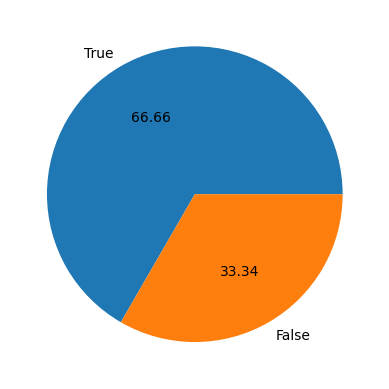

In [26]:
import matplotlib.pyplot as plt
plt.pie(df['Label'].value_counts(),labels=['True','False'],autopct="%0.2f")
plt.show()

In [27]:
import nltk
#it is used in natural language 

In [28]:
df['num_character']=df['Statement'].apply(len)

In [29]:
df.head()

,Statement,Label,num_character
0,"who praises india's aarogya setu app, says it ...",1,85
1,"in delhi, deputy us secretary of state stephen...",1,83
2,lac tensions: china's strategy behind delibera...,1,75
3,india has signed 250 documents on space cooper...,1,81
4,tamil nadu chief minister's mother passes away...,1,52


df.Statement[0]

In [30]:
df.Statement[0]

"who praises india's aarogya setu app, says it helped in identifying covid-19 clusters"

In [31]:
df[df['Label'] == 0].head()


,Statement,Label,num_character
37800,fact check: 1938 video of bks iyengar shared ...,0,73
37801,fact check: conspiracy theory claims sushant ...,0,84
37802,fact check: gujarats rani ki vav shared as p...,0,83
37803,"fact check: no, pm modi has not announced ano...",0,69
37804,fact check: the curious case of a 'desecrated...,0,76


In [32]:
#num of word
df['num_words']=df['Statement'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
df.head()

,Statement,Label,num_character,num_words
0,"who praises india's aarogya setu app, says it ...",1,85,15
1,"in delhi, deputy us secretary of state stephen...",1,83,14
2,lac tensions: china's strategy behind delibera...,1,75,12
3,india has signed 250 documents on space cooper...,1,81,14
4,tamil nadu chief minister's mother passes away...,1,52,10


In [34]:
df.describe()

,Label,num_character,num_words
count,56703.000000,56703.000000,56703.000000
mean,0.666631,80.548260,14.187380
std,0.471421,27.348971,5.321083
min,0.000000,14.000000,2.000000
25%,0.000000,64.000000,11.000000
50%,1.000000,77.000000,13.000000
75%,1.000000,90.000000,16.000000
max,1.000000,348.000000,59.000000


In [35]:
df['num_sen']=df['Statement'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Statement,Label,num_character,num_words,num_sen
0,"who praises india's aarogya setu app, says it ...",1,85,15,1
1,"in delhi, deputy us secretary of state stephen...",1,83,14,1
2,lac tensions: china's strategy behind delibera...,1,75,12,1
3,india has signed 250 documents on space cooper...,1,81,14,1
4,tamil nadu chief minister's mother passes away...,1,52,10,1


In [36]:
df[['num_character','num_words','num_sen']].describe()

,num_character,num_words,num_sen
count,56703.000000,56703.000000,56703.000000
mean,80.548260,14.187380,1.062483
std,27.348971,5.321083,0.264858
min,14.000000,2.000000,1.000000
25%,64.000000,11.000000,1.000000
50%,77.000000,13.000000,1.000000
75%,90.000000,16.000000,1.000000
max,348.000000,59.000000,6.000000


In [37]:
df[df['Label']==0][['num_character','num_words','num_sen']].describe()

,num_character,num_words,num_sen
count,18903.000000,18903.000000,18903.000000
mean,91.243930,16.852087,1.172142
std,37.626053,7.188376,0.420223
min,14.000000,2.000000,1.000000
25%,66.000000,12.000000,1.000000
50%,78.000000,14.000000,1.000000
75%,100.000000,18.000000,1.000000
max,316.000000,59.000000,6.000000


In [38]:
df[df['Label']==1][['num_character','num_words','num_sen']].describe()

,num_character,num_words,num_sen
count,37800.000000,37800.000000,37800.000000
mean,75.199577,12.854815,1.007646
std,18.117576,3.362580,0.088908
min,14.000000,2.000000,1.000000
25%,63.000000,11.000000,1.000000
50%,77.000000,13.000000,1.000000
75%,89.000000,15.000000,1.000000
max,348.000000,55.000000,3.000000


In [39]:
import seaborn as sns

C:\Users\Ronit kothari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ronit kothari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ronit kothari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ronit kothari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

<Axes: xlabel='num_character', ylabel='Count'>

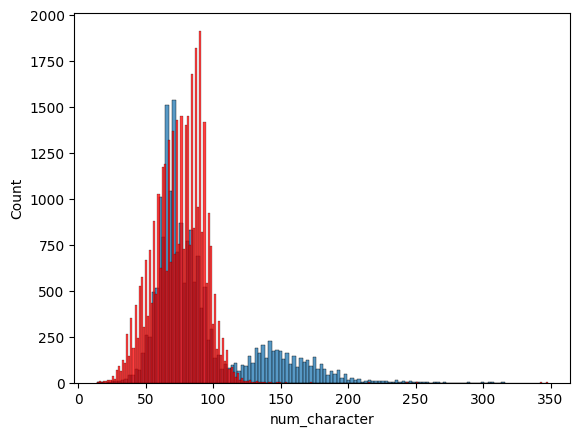

In [40]:
sns.histplot(df[df['Label']==0]['num_character'])
sns.histplot(df[df['Label']==1]['num_character'],color='red')

In [41]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ronit
[nltk_data]     kothari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
ps.stem('loving')

'love'

In [45]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]#cloning
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [46]:
import swifter

df['transformed_text'] = df['Statement'].swifter.apply(transform_text)

Pandas Apply:   0%|          | 0/56703 [00:00<?, ?it/s]

In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=600, height=600, min_font_size=10, background_color='white')


In [48]:
truenews=wc.generate(df[df['Label']==1]['transformed_text'].str.cat(sep=" "))

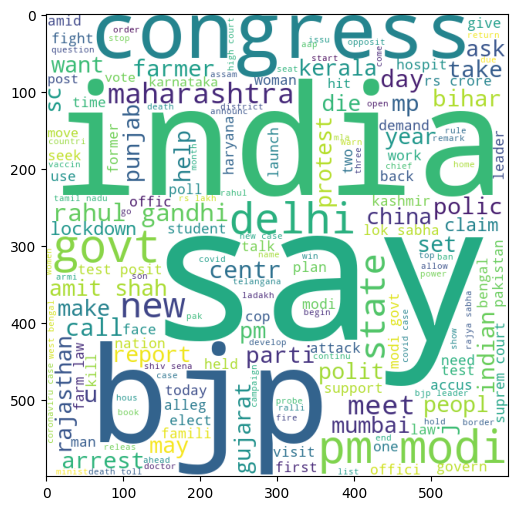

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(truenews)

In [50]:
falsenews=wc.generate(df[df['Label']==0]['transformed_text'].str.cat(sep=" "))

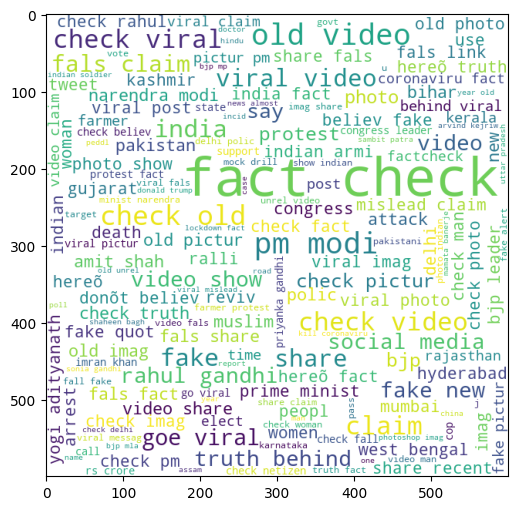

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(falsenews)

In [52]:
fake_corpus=[]
for msg in df[df['Label']==0]['transformed_text'].tolist():
    for word in msg.split():
        fake_corpus.append(word)

In [53]:
len(fake_corpus)

188463

In [54]:
from collections import Counter
pd.DataFrame(Counter(fake_corpus).most_common(30))

,0,1
0,check,9906
1,fact,8874
2,video,4358
3,viral,2803
4,claim,2267
5,share,2261
6,fake,2218
7,old,1900
8,fals,1605
9,modi,1424


In [55]:
# from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# cv=CountVectorizer()
# tfidf=TfidfVectorizer(max_features=3000)

In [56]:
# X=tfidf.fit_transform(df['transformed_text']).toarray()

In [57]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [58]:
# X.shape

In [59]:
def text_to_word2vec_vector(text, wv_model):
    words = [word for word in text.split() if word in wv_model.key_to_index]
    if len(words) == 0:
        return np.zeros(wv_model.vector_size)
    text_vector = np.mean([wv_model[word] for word in words], axis=0)
    return text_vector

# Applying Word2Vec conversion to the preprocessed text
X = np.array([text_to_word2vec_vector(text, wv) for text in df['transformed_text']])


In [60]:
X


array([[ 0.02897135, -0.04130046,  0.01189168, ..., -0.04697673,
        -0.03996785,  0.06184896],
       [-0.01780192,  0.07867432,  0.12643687, ..., -0.03664144,
        -0.01966349,  0.05425008],
       [ 0.01574053,  0.06346785,  0.06993757, ..., -0.03902762,
         0.04528809, -0.03226144],
       ...,
       [ 0.02244568,  0.01144791, -0.04451561, ..., -0.03914642,
         0.03768921, -0.0267334 ],
       [ 0.01369629, -0.03738403, -0.05163574, ...,  0.00148315,
         0.0559082 ,  0.01117554],
       [ 0.05016535,  0.06607333, -0.00803306, ..., -0.06477217,
        -0.00640037,  0.07178844]])

In [61]:
y=df['Label'].values

In [62]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
# mnb=MultinomialNB()

In [67]:
# mnb.fit(X_train,y_train)
# y_pred2=mnb.predict(X_test)
# print(accuracy_score(y_test,y_pred2))
# print(confusion_matrix(y_test,y_pred2))
# print(precision_score(y_test,y_pred2))

In [68]:
# predictedtext = transform_text("UNESCO declares PM Modi best Prime Minister")
# input_tfidf = tfidf.transform([predictedtext])
# user_prediction = mnb.predict(input_tfidf)
# print("Predicted Label: ", user_prediction)


In [69]:
from sklearn.ensemble import RandomForestClassifier


In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=50,  
    max_depth=None,    
    max_features='sqrt',
    min_samples_split=5,
    n_jobs=-1,         
    random_state=42     
)


In [71]:
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9016841548364342


In [72]:
# text_to_predict = ["UNESCO declares PM Modi best Prime Minister"]
# y_pred = mnb.predict(text_to_predict)
# print(y_pred)


In [73]:

# predictedtext = transform_text("UNESCO declares PM Modi best Prime Minister")





In [74]:



# y_pred = mnb.predict(predictedtext)
# print(y_pred)

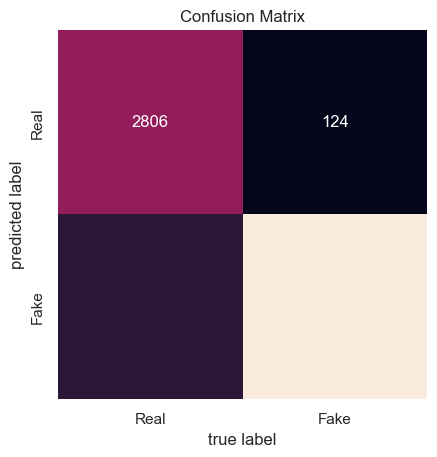

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()  # for plot styling

# Assuming y_test and y_pred are defined
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix')
plt.show()


In [76]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


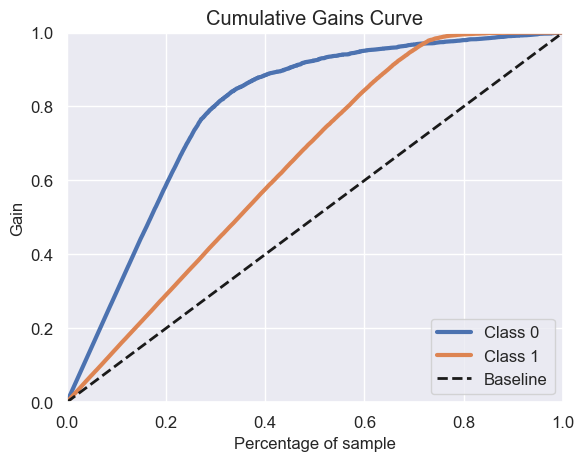

In [77]:
import scikitplot as skplt
import matplotlib.pyplot as plt

# Assuming you have a trained model 'clf' and test set 'X_test', 'y_test'
y_probas = rf.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()


In [78]:
print(rf.classes_)


[0 1]


In [79]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train, y_train)
y_prediction = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_prediction)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9016841548364342


In [80]:
from sklearn.tree import DecisionTreeClassifier
ds=DecisionTreeClassifier(random_state=42)



In [81]:
ds.fit(X_train, y_train)

y_pred =ds.predict(X_test)


In [82]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8109514152191165


In [83]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [84]:
# Assuming the necessary libraries are already imported and the Word2Vec model is loaded as `wv`

def predict_news(text, wv_model, rf):
    # Step 1: Preprocess the text
    preprocessed_text = transform_text(text)
    
    # Step 2: Convert to Word2Vec vector
    word2vec_vector = text_to_word2vec_vector(preprocessed_text, wv_model).reshape(1, -1)  # Reshape for a single prediction
    
    # Step 3: Predict with your model
    prediction = lr.predict(word2vec_vector)
    
    # Assuming your model predicts 1 for "Real News" and 0 for "Fake News"
    if prediction == 1:
        return "Real News"
    else:
        return "Fake News"

# Example usage:
personalized_news = "Rahul Gandhi is the Prime Minister"
prediction_result = predict_news(personalized_news, wv, rf)  # Replace `model` with your actual model variable
print(prediction_result)


Real News


In [85]:
X_train.shape[1]

300

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the MLP model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
#     Dropout(0.2),
    Dense(256, activation='relu'),
#     Dropout(0.2),
    Dense(128, activation='relu'),
#     Dropout(0.2),
    Dense(64, activation='relu'),
#     Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Use 'softmax' if you have more than two classes
])

model.summary()  # Prints the summary of the model



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               154112    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [87]:
from tensorflow.keras.optimizers import Adam

In [88]:
adam = Adam(learning_rate=0.01)
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [89]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=25,
                    validation_split=0.2)

Epoch 1/10


1452/1452 [==============================] - 17s 9ms/step - loss: 0.3207 - accuracy: 0.8864 - val_loss: 0.2656 - val_accuracy: 0.9008
Epoch 2/10
1452/1452 [==============================] - 13s 9ms/step - loss: 0.2771 - accuracy: 0.9014 - val_loss: 0.2721 - val_accuracy: 0.9069
Epoch 3/10
1452/1452 [==============================] - 13s 9ms/step - loss: 0.2721 - accuracy: 0.9039 - val_loss: 0.2492 - val_accuracy: 0.9093
Epoch 4/10
1452/1452 [==============================] - 13s 9ms/step - loss: 0.2585 - accuracy: 0.9082 - val_loss: 0.2579 - val_accuracy: 0.9030
Epoch 5/10
1452/1452 [==============================] - 13s 9ms/step - loss: 0.2353 - accuracy: 0.9182 - val_loss: 0.2498 - val_accuracy: 0.9108
Epoch 6/10
1452/1452 [==============================] - 13s 9ms/step - loss: 0.2336 - accuracy: 0.9145 - val_loss: 0.2677 - val_accuracy: 0.9055
Epoch 7/10
1452/1452 [==============================] - 13s 9ms/step - loss: 0.2272 - accuracy: 0.9156 - val_loss: 0.2783 - val_

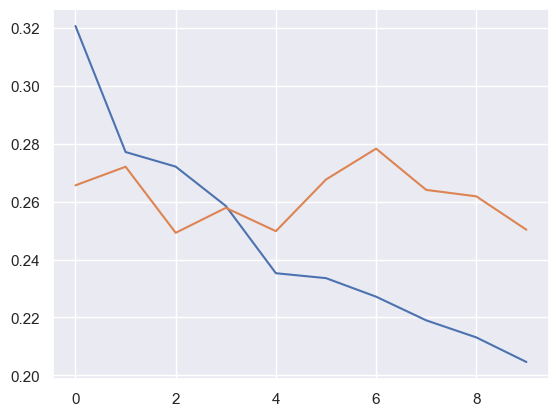

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [91]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

355/355 [==============================] - 2s 4ms/step - loss: 0.2514 - accuracy: 0.9149
Test Accuracy: 91.49%


In [92]:
import numpy as np

def predict_with_mlp(text, wv_model, mlp_model):
    preprocessed_text = transform_text(text)
    word2vec_vector = text_to_word2vec_vector(preprocessed_text, wv_model).reshape(1, -1) 
    # Reshape for a single prediction
    print(word2vec_vector)
    prediction = mlp_model.predict(word2vec_vector)
    print(prediction)
#     predicted_class = np.round(prediction).astype(int)  # Round the sigmoid output to get the class
    
    if prediction > 0.61:
        return "Real News"
    else:
        return "Fake News"

# Example usage
personalized_news = "Fact Check: Did UPA Invite Taliban Leader To Speak At Think Fest In 2013?"
prediction_result = predict_with_mlp(personalized_news, wv, model)
print(prediction_result)


[[ 0.04255676  0.04592896  0.08689117  0.16474009 -0.07982254  0.07112694
   0.02047729 -0.04425049  0.0397644   0.0078125  -0.08918762 -0.14417267
  -0.1190033   0.05081177 -0.06318665  0.115448    0.06462097  0.03892612
  -0.05802917 -0.15724182  0.07063961  0.12795162  0.07523346 -0.05975723
   0.0087204  -0.04863107 -0.12179565  0.0043335   0.0417099  -0.09851074
  -0.00030518  0.06029916 -0.11434937  0.08961487 -0.04821777 -0.01007843
   0.06414795  0.01377106  0.10950947 -0.00117493  0.08954239 -0.13587189
   0.1242485   0.08465576 -0.06985474 -0.1137085  -0.10219574 -0.04375553
  -0.02308655  0.0912323   0.01178551  0.03921509  0.05429077  0.06158447
  -0.00315857 -0.07211304 -0.04544067 -0.00848389  0.09136963 -0.11886597
   0.03297424  0.10496521 -0.09008789 -0.14978027 -0.03540039 -0.13690186
  -0.07870102  0.08502197  0.05117798  0.12380981  0.04466248  0.12371826
   0.00737     0.02800751 -0.19515228 -0.11582947 -0.01669312  0.03386688
   0.10472488  0.05769348 -0.08776855 

In [93]:
X_test[15]

array([ 4.58984375e-02,  1.47216795e-02,  4.88037094e-02,  6.28662109e-02,
        1.69677734e-02, -1.04931638e-01,  2.83203134e-03, -3.80859375e-02,
        1.00781247e-01, -5.20019513e-03, -4.47937027e-02, -1.58593744e-01,
       -1.21289060e-01,  9.07958969e-02, -1.55957028e-01,  1.29638672e-01,
        1.15133666e-01, -1.93481450e-03,  4.07714844e-02,  1.70898435e-04,
        6.89453110e-02,  2.22900398e-02, -2.70004272e-02, -2.57324222e-02,
       -5.07812481e-03, -1.49707034e-01, -7.68066421e-02, -1.19384769e-02,
       -1.66748054e-02, -6.50085434e-02,  1.01562496e-02, -8.36425796e-02,
       -1.03466794e-01,  3.58886719e-02, -1.13952635e-02, -3.12011726e-02,
        5.27099594e-02, -4.96582016e-02,  9.30908173e-02,  7.56835914e-04,
        1.73522942e-02,  2.90527344e-02,  1.32641599e-01,  7.94250518e-02,
        1.75094604e-02, -1.04003906e-01, -3.52783203e-02, -4.65209968e-02,
        9.49676484e-02,  1.32958978e-01,  3.77441421e-02,  7.70477280e-02,
        2.54394524e-02,  

In [94]:
import pickle

In [95]:
# # Load the RandomForest model
# pickle.dump(rf,open('random_forest.pkl','wb'))
   

# # Load the Logistic Regression model
# pickle.dump(lr,open('logisticregression.pkl','wb'))


# # Load the Naive Bayes model
# # pickle.dump(mnb,open('nayesbayes.pkl','wb'))
   

# # Load the TF-IDF Vectorizer
# pickle.dump(tfidf,open('tfidf.pkl','wb'))


In [96]:
filtered_df = df[df['Label'] == 0]
print(filtered_df['Statement'].iloc[32])

fact check: postcard news fakes data to show more sports medals during nda rule than upa


In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [ ]:
# X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
model1 = Sequential([
    LSTM(units=256, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True),
    LSTM(units=128, return_sequences=True),
     Dropout(0.3),
    LSTM(units=64, return_sequences=True),
    Dropout(0.4),
#     LSTM(units=32,return_sequences=True),
#     Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model1.summary()


In [ ]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.01)
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=25,
                    validation_split=0.2)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

In [ ]:
# tensorflow --version


In [ ]:
# Save the MLP model
model.save('mlp_model.h5')

# Save the LSTM model
model1.save('lstm_model.h5')